In [9]:
import pandas as pd
import numpy as np

ds = pd.read_csv(r'Raw Data.csv')

print(ds)

df = pd.DataFrame(ds, columns = ['Order Date', 'Sales', 'Profit'])

df

      Order Date      Customer Name         State         Category  \
0     03-01-2014      Darren Powers         Texas  Office Supplies   
1     04-01-2014      Phillina Ober      Illinois  Office Supplies   
2     04-01-2014      Phillina Ober      Illinois  Office Supplies   
3     04-01-2014      Phillina Ober      Illinois  Office Supplies   
4     05-01-2014         Mick Brown  Pennsylvania  Office Supplies   
...          ...                ...           ...              ...   
9989  30-12-2017  Patrick O'Donnell      New York       Technology   
9990  30-12-2017  Patrick O'Donnell      New York  Office Supplies   
9991  30-12-2017         Erica Bern    California  Office Supplies   
9992  30-12-2017         Erica Bern    California  Office Supplies   
9993  30-12-2017      Jill Matthias      Colorado  Office Supplies   

     Sub-Category                                       Product Name   Sales  \
0           Paper  Message Book, Wirebound, Four 5 1/2" X 4" Form...   16.45   

,Order Date,Sales,Profit
0,03-01-2014,16.45,5.55
1,04-01-2014,11.78,4.27
2,04-01-2014,272.74,-64.77
3,04-01-2014,3.54,-5.49
4,05-01-2014,19.54,4.88
...,...,...,...
9989,30-12-2017,90.93,2.73
9990,30-12-2017,52.78,19.79
9991,30-12-2017,13.90,4.52
9992,30-12-2017,20.72,6.48


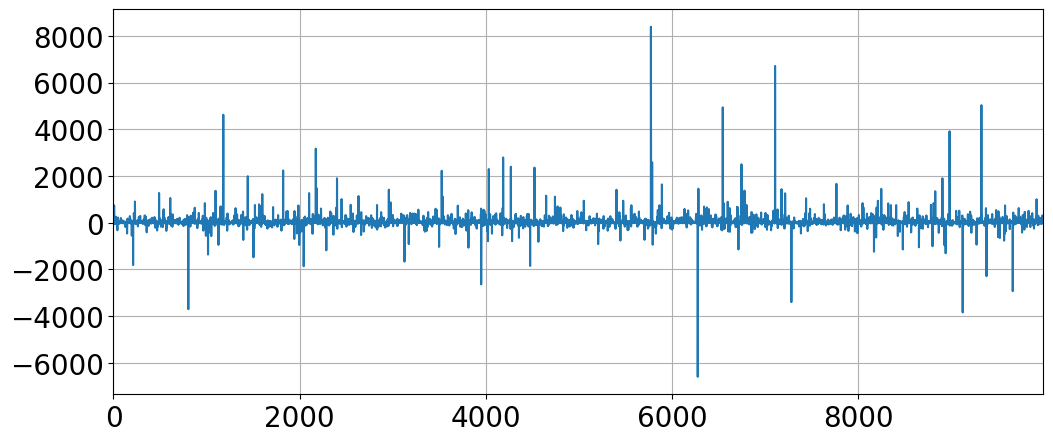

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(df['Profit'])

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Загрузка данных
data = pd.read_csv('Raw Data.csv')  # Замените 'Raw Data.csv' на путь к вашему файлу данных

# Преобразование данных во временной ряд
data['Order Date'] = pd.to_datetime(data['Order Date'])
time_series = data.set_index('Order Date')['Sales']

# Визуализация временного ряда
plt.figure(figsize=(10, 6))
plt.plot(time_series)
plt.title('Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Проверка стационарности временного ряда
def test_stationarity(time_series):
    # Определение статистики и критических значений для теста Дики-Фуллера
    dftest = adfuller(time_series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    return dfoutput

stationarity_results = test_stationarity(time_series)
print(stationarity_results)

# Разложение временного ряда на тренд, сезонность и остатки
decomposition = seasonal_decompose(time_series, model='additive')

# Визуализация разложенных компонент
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(time_series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

ValueError: time data "13-01-2014" doesn't match format "%m-%d-%Y", at position 8. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.